# Analysis of Lung LPS and tabula Senis data

In this Notebook the single cell RNAseq data from Zhang, L. et al. Single-cell transcriptomic profiling of lung endothelial cells identifies dynamic inflammatory and regenerative subpopulations. JCI Insight 7, (2022) is primarily analyzed.

The Motivation was to see how Aplnr expression reacts the the inflammation stimulus given and if senescence processes are initated in the endothelial cells. 



In [4]:
import scanpy as sc
import yaml
import os
import pandas as pd
import numpy as np
import decoupler as dc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




os.environ['HTTP_PROXY']="http://www-int.dkfz-heidelberg.de:80"
os.environ['HTTPS_PROXY']="http://www-int.dkfz-heidelberg.de:80"

In [5]:
!which python

/bin/python


In [6]:
if "snakemake" not in globals():
    with open("configs/lung_lps.yaml", "r") as stream:
        try:
            config=yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            print(exc)

In [7]:
if "snakemake" in globals():
    paths = snakemake.input["adata_paths"]
else:
    paths = [os.path.join(config["BASE_FP"], config["DATASET"], sample, "anndata", "adata_norm_processed.h5ad") for sample in config["samples"].keys()]

adata = list(map(sc.read_h5ad, paths))


## Full Dataset

We satrt off by analyzing these data by loading an adata object of all cells and adding the cluster annotaions by the authors (provided upon request)

Then we add the "immunec" and devEC populations based on the marker genes described in the paper above to assign the clusters to the cell tyes described.


The we plot the UMAPS

In [8]:
if "snakemake" in globals():
    adata_big = sc.read_h5ad(snakemake.input["adata_big"])
    adata_out_path = snakemake.output["adata_processed"]
else:
    adata_big=sc.read_h5ad("/omics/odcf/analysis/OE0228_projects/VascularAging/rna_sequencing/public_scrnaseq/lung_lps/merged/anndata/adata_merged.h5ad")

In [9]:
sample_names = ["basal", "Hour6","Day1", "Day2", "Day3", "Day7"]
labels = dict()
for s_name in sample_names:
    labels[s_name] = pd.read_csv(f"./data/lunglps/{s_name}_label.csv").set_index("Unnamed: 0")
    

In [10]:
labels["basal"] = labels["basal"].replace({1: "immunec", 2: "devEC", 3: "Aerocyte"})
labels["Hour6"] = labels["Hour6"].replace({1: "immunec", 2: "devEC", 3: "Aerocyte"})
labels["Day1"] = labels["Day1"].replace({1: "immunec", 2: "devEC", 3: "Aerocyte"})
labels["Day2"] = labels["Day2"].replace({1: "immunec", 2: "devEC", 4: "Aerocyte"})
labels["Day3"] = labels["Day3"].replace({1: "immunec", 3: "proEC", 2: "Aerocyte"})
labels["Day7"] = labels["Day7"].replace({1: "immunec", 2: "devEC", 4: "Aerocyte"})
labels_all = pd.concat(labels)
labels_all=labels_all.reset_index()
labels_all=labels_all.rename(columns={"level_0": "samples","Unnamed: 0": "cell_id"})


In [11]:
labels_all["cell_type"] = labels_all["Clusters"]

labels_all["cell_type"] = labels_all["cell_type"].replace({"devEC": "devEC/proEC", "proEC": "devEC/proEC"})

labels_all["cell_type"] = labels_all["cell_type"].where(labels_all["cell_type"].isin(["devEC/proEC", "Aerocyte", "immunec"])).replace({np.nan: "other"})


In [12]:
labels_all=labels_all.set_index("cell_id")

In [13]:
import scipy.sparse as sp

# Convert ndarray to csr_matrix



In [14]:
adata_big.obs["Clusters"] = labels_all["Clusters"]
adata_big.obs["cell_type"] = labels_all["cell_type"]
adata_big.obs["Clusters"][adata_big.obs["Clusters"].isnull()] = "missing"

sc.pp.filter_genes(adata_big, min_cells=1)
#sc.pp.highly_variable_genes(adata_big)


/tmp/ipykernel_27565/951632876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_big.obs["Clusters"][adata_big.obs["Clusters"].isnull()] = "missing"


In [15]:

#sc.tl.pca(adata_big)
#sc.pl.pca_variance_ratio(adata_big, log=False)

In [16]:
#sc.pp.neighbors(adata_big,n_pcs = 15)
#sc.tl.umap(adata_big, )

/omics/groups/OE0436/internal/heyer/conda/envs/lunglps/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/omics/groups/OE0436/internal/heyer/conda/envs/lunglps/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


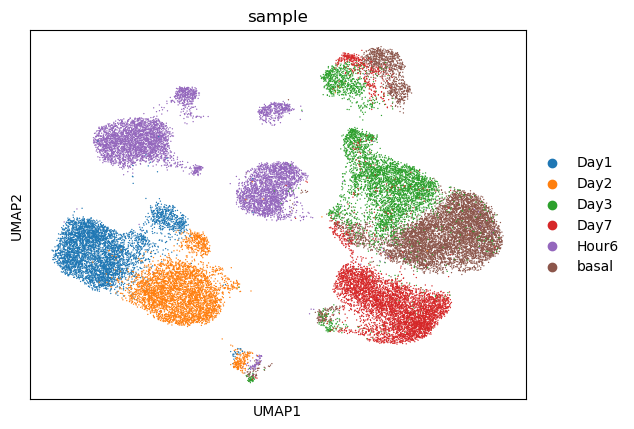

/omics/groups/OE0436/internal/heyer/conda/envs/lunglps/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/omics/groups/OE0436/internal/heyer/conda/envs/lunglps/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


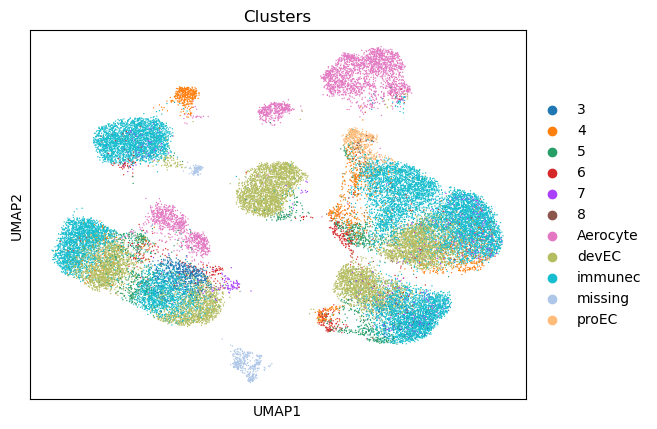

/omics/groups/OE0436/internal/heyer/conda/envs/lunglps/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/omics/groups/OE0436/internal/heyer/conda/envs/lunglps/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


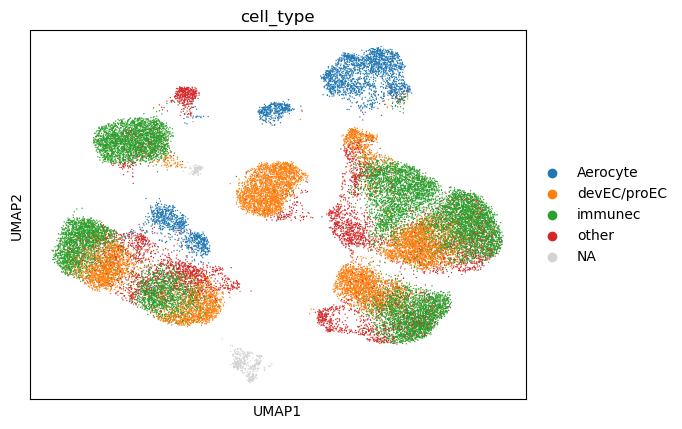

In [17]:
adata_big.obs["Clusters"] = adata_big.obs["Clusters"].astype("category")
sc.pl.umap(
    adata_big,
    color=["sample"]
)
sc.pl.umap(adata_big, color = "Clusters")
sc.pl.umap(adata_big, color = "cell_type")

These first wo UMAPS above show cells from all expreiments and the clusters annotated from in the second figure. 

Aerocytes cljuster separately to all other cells. Among the other ECs Hour6 both devEC and ImmuneEC populations cluster away -> Whereas in the other data these cell types seem to cluster in one large cluster in the middle. 

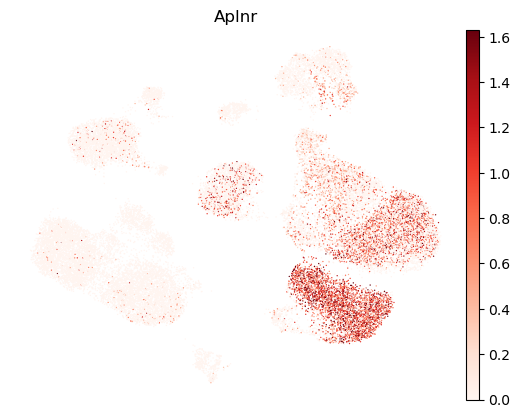

In [18]:
sc.pl.umap(
    adata_big, 
    color=["Aplnr"],     
    vmin=0,
    vmax="p99",  # set vmax to the 99th percentile of the gene count instead of the maximum, to prevent outliers from making expression in other cells invisible. Note that this can cause problems for extremely lowly expressed genes.
    sort_order=False,  # do not plot highest expression on top, to not get a biased view of the mean expression among cells
    frameon=False,
    cmap="Reds")
        

## Compositional Analysis

Analyze the composition of the annoated EC cell types to track the changes. 


In [19]:

import pertpy as pt


In [20]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata_big,
    type="cell_level",
    cell_type_identifier="cell_type",
    sample_identifier="sample",
)
sccoda_data

MuData object with n_obs × n_vars = 32137 × 16551
  var:	'n_cells'
  2 modalities
    rna:	32131 x 16547
      obs:	'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'scDblFinder_score', 'scDblFinder_class', 'Clusters', 'cell_type', 'scCODA_sample_id'
      var:	'mt', 'ribo', 'hb', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'hvg', 'log1p', 'neighbors', 'pca', 'umap', 'sample_colors', 'Clusters_colors', 'cell_type_colors'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'log1p_norm', 'soupX_counts'
      obsp:	'connectivities', 'distances'
    coda:	6 x 4
      obs:	'sample'
      var:	'n_cells'

<Axes: xlabel='Cell type', ylabel='Proportion'>

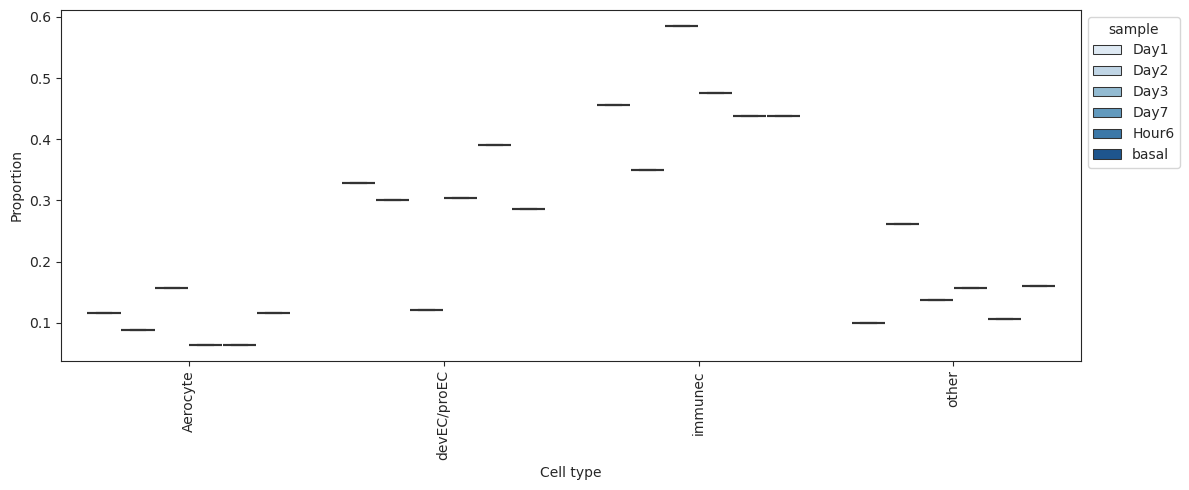

In [21]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="sample",
    figsize=(12, 5),
    add_dots=False,
    args_swarmplot={"palette": ["red"]},
)


<Axes: title={'center': 'sample'}, ylabel='Proportion'>

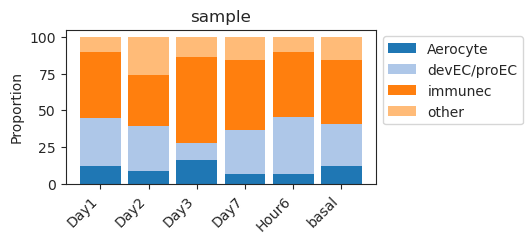

In [22]:
pt.pl.coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="sample", figsize=(4, 2),
)

Aplnr Expression is primarily in the center cluster with some expression in the DevEC and immuneEC cluster in the center of the image. 

## Get Annotations

Functional annotations are added from MSIGDB and we also create a subdataset with signatures from FRIDMAN_SENSCENCE_UP/DN

In [23]:
msigdb=pd.read_csv("resources/msig_mouse.csv.gz")
msig_small=msigdb[["genesymbol","geneset"]].drop_duplicates()
senescence = msig_small[msig_small['geneset'].isin(['FRIDMAN_SENESCENCE_UP', 'FRIDMAN_SENESCENCE_DN'])]

In [24]:
import pandas as pd

# Define the URL of the TSV file
url = "http://www.informatics.jax.org/downloads/reports/HMD_HumanPhenotype.rpt"

# Define the column names for the dataframe
col_names = ["hgene","hID", "mgene", "mID", "lcol", "ncol"]

# Use pandas to read the TSV file into a dataframe
mouse_human_homologs = pd.read_csv(url, sep="\t", header = None, index_col=None)
mouse_human_homologs.columns = col_names
# Print the first few rows of the dataframe


In [25]:
# Subset adata_object
adata_hvg = adata_big[:, adata_big.var["highly_variable"]]

In [26]:
adata_hvg

View of AnnData object with n_obs × n_vars = 32131 × 4000
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'scDblFinder_score', 'scDblFinder_class', 'Clusters', 'cell_type', 'scCODA_sample_id'
    var: 'mt', 'ribo', 'hb', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'umap', 'sample_colors', 'Clusters_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'log1p_norm', 'soupX_counts'
    obsp: 'connectivities', 'distances'

### EC.SENESCENCE.SIG 

THe gene list below was taken from Wu, Z., Uhl, B., Gires, O. & Reichel, C. A. A transcriptomic pan-cancer signature for survival prognostication and prediction of immunotherapy response based on endothelial senescence. J Biomed Sci 30, 1–19 (2023).
where a pan-cancer transriptome signature for EC senscence is descrbied. -> We checked its activitiy in this dataset to asses it versus other known senescence indicators. 

We translate the genes to the human homologs to start off. and then add it to our senescence signature of interest. 

In [27]:
import pandas as pd

# List of genes as a Python Series
gene_series = [
    "FERMT2", "PLXNA2", "FLT1", "CAV2", "ICAM2", "GALNT18", "LAMA4", "SPARC", "PCDH12",
    "PLEKHG1", "MYCT1", "EFNB2", "CD93", "RHOJ", "KDR", "PODXL", "DLL4", "DOCK6", "PLVAP",
    "TMEM204", "NES", "COL4A2", "HECW2", "DUSP6", "ACVRL1", "PTPRG", "ESAM", "PRSS23", "GJA1",
    "AFAP1L1", "STC1", "COX7A1", "ITGA5", "BCL6B", "IGFBP7", "TM4SF18", "DLC1", "JCAD", "CYYR1",
    "SYNPO", "MMRN2", "CD34", "FZD4", "A2M", "CAVIN1", "CDH5", "IL3RA", "BCAM", "COL4A1",
    "S100A16", "TCF4", "TGM2", "BMPR2", "SCARF1", "ECE1", "PLK2", "RHOC", "SERPINH1", "INSR",
    "IPO11", "MAGI1", "NID1", "MECOM", "UACA", "TUBB6", "LMO2", "NECTIN2", "GRB10", "LAMA5",
    "LUZP1", "MAST4", "DYSF", "PNP", "NRP1", "CAVIN3", "LRRC8A", "EFNA1", "NFIA", "EHD4",
    "TNFAIP1", "PLXND1", "LAMB1", "RGS3", "ZEB1", "TRIOBP", "FSCN1", "YES1", "JAG1", "PEA15",
    "RAB13", "PHACTR2", "LAMC1", "VWA1", "PPIC", "SLC44A2", "PLEKHA1", "TPM4", "GNAI2", "MGLL",
    "UTRN", "CAPNS1"
]

# Print the Series 
print(gene_series)


['FERMT2', 'PLXNA2', 'FLT1', 'CAV2', 'ICAM2', 'GALNT18', 'LAMA4', 'SPARC', 'PCDH12', 'PLEKHG1', 'MYCT1', 'EFNB2', 'CD93', 'RHOJ', 'KDR', 'PODXL', 'DLL4', 'DOCK6', 'PLVAP', 'TMEM204', 'NES', 'COL4A2', 'HECW2', 'DUSP6', 'ACVRL1', 'PTPRG', 'ESAM', 'PRSS23', 'GJA1', 'AFAP1L1', 'STC1', 'COX7A1', 'ITGA5', 'BCL6B', 'IGFBP7', 'TM4SF18', 'DLC1', 'JCAD', 'CYYR1', 'SYNPO', 'MMRN2', 'CD34', 'FZD4', 'A2M', 'CAVIN1', 'CDH5', 'IL3RA', 'BCAM', 'COL4A1', 'S100A16', 'TCF4', 'TGM2', 'BMPR2', 'SCARF1', 'ECE1', 'PLK2', 'RHOC', 'SERPINH1', 'INSR', 'IPO11', 'MAGI1', 'NID1', 'MECOM', 'UACA', 'TUBB6', 'LMO2', 'NECTIN2', 'GRB10', 'LAMA5', 'LUZP1', 'MAST4', 'DYSF', 'PNP', 'NRP1', 'CAVIN3', 'LRRC8A', 'EFNA1', 'NFIA', 'EHD4', 'TNFAIP1', 'PLXND1', 'LAMB1', 'RGS3', 'ZEB1', 'TRIOBP', 'FSCN1', 'YES1', 'JAG1', 'PEA15', 'RAB13', 'PHACTR2', 'LAMC1', 'VWA1', 'PPIC', 'SLC44A2', 'PLEKHA1', 'TPM4', 'GNAI2', 'MGLL', 'UTRN', 'CAPNS1']


In [28]:
mouse_genes = mouse_human_homologs[mouse_human_homologs["hgene"].isin(gene_series)]
mouse_genes

hgene     hID    mgene          mID  \
2          A2M       2      A2m  MGI:2449119   
256     ACVRL1      94   Acvrl1  MGI:1338946   
421    AFAP1L1  134265  Afap1l1  MGI:2147199   
1603      BCAM    4059     Bcam  MGI:1929940   
1639     BCL6B  255877    Bcl6b  MGI:1278332   
...        ...     ...      ...          ...   
25213     UACA   55075     Uaca  MGI:1919815   
25741     UTRN    7402     Utrn   MGI:104631   
25935     VWA1   64856     Vwa1  MGI:2179729   
26168     YES1    7525     Yes1    MGI:99147   
26325     ZEB1    6935     Zeb1  MGI:1344313   

                                                    lcol  ncol  
2                                                    NaN   NaN  
256    MP:0003631, MP:0005369, MP:0005370, MP:0005376...   NaN  
421                                                  NaN   NaN  
1603                                                 NaN   NaN  
1639                  MP:0005384, MP:0005387, MP:0005397   NaN  
...                                                  ...   ...  
25213  MP:0002006, MP:0005367, MP:0005370, MP:0005376...   NaN  
25741                 MP:0003631, MP:0005376, MP:0010768   NaN  
25935                             MP:0003631, MP:0005386   NaN  
26168                                                NaN   NaN  
26325  MP:0001186, MP:0002006, MP:0003631, MP:0005369...   NaN  

[102 rows x 6 columns]

In [34]:
EC_sig = pd.DataFrame({"genesymbol": mouse_genes.mgene, "geneset": "ec_Senescence_sig"})

In [35]:
import pandas as pd
# GEt Quiescence Signatures read from "../multicondition-deseq2-enrichment/data/senescence_genesets.txt"

filepath = "../multicondition-deseq2-enrichment/data/senescence_genesets.txt"
df = pd.read_csv(filepath, sep='\t')
# change df colnames to "genesymbol" and "geneset"
df.columns = ["geneset", "genesymbol"]
df



geneset genesymbol
0     FRIDMAN_SENESCENCE_DN    Aldh1a7
1     FRIDMAN_SENESCENCE_DN       Bmi1
2     FRIDMAN_SENESCENCE_DN       Ccn4
3     FRIDMAN_SENESCENCE_DN      Ccnb1
4     FRIDMAN_SENESCENCE_DN     Cdc25b
...                     ...        ...
1457       paper_quies_down      Usp22
1458       paper_quies_down      Usp39
1459       paper_quies_down      Wbp11
1460       paper_quies_down      Wdr76
1461       paper_quies_down     Zfp142

[1462 rows x 2 columns]

In [36]:
full_sen =pd.concat([senescence, df])

# Remove duplicated entries

full_sen = full_sen[~full_sen.duplicated(['geneset', 'genesymbol'])]

In [37]:
hallmarks = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
hallmarks = hallmarks[~hallmarks.duplicated(['geneset', 'genesymbol'])]
hallmarks

uniprot genesymbol entity_type collection  \
233      O54791       Maff     protein   hallmark   
250      O54791       Maff     protein   hallmark   
270      O54791       Maff     protein   hallmark   
373      O54791       Maff     protein   hallmark   
377      O54791       Maff     protein   hallmark   
...         ...        ...         ...        ...   
3899655  O08599     Stxbp1     protein   hallmark   
3900302  Q9ER73       Elp4     protein   hallmark   
3900513  P55095        Gcg     protein   hallmark   
3900718  P21661      Pcsk2     protein   hallmark   
3900903  P63015       Pax6     protein   hallmark   

                                  geneset  
233          HALLMARK_IL2_STAT5_SIGNALING  
250                  HALLMARK_COAGULATION  
270                      HALLMARK_HYPOXIA  
373      HALLMARK_TNFA_SIGNALING_VIA_NFKB  
377                   HALLMARK_COMPLEMENT  
...                                   ...  
3899655      HALLMARK_PANCREAS_BETA_CELLS  
3900302      HALLMARK_PANCREAS_BETA_CELLS  
3900513      HALLMARK_PANCREAS_BETA_CELLS  
3900718      HALLMARK_PANCREAS_BETA_CELLS  
3900903      HALLMARK_PANCREAS_BETA_CELLS  

[6071 rows x 5 columns]

In [38]:
#adata_big.X = adata_big.layers["scran_normalization"]

In [39]:
#adata_big.layers

In [40]:
dc.run_ora(
    mat=adata_hvg,
    net=pd.concat([hallmarks, full_sen]),
    source='geneset',
    target='genesymbol',
    verbose=True,
    use_raw=False
)

Running ora on mat with 32131 samples and 4000 targets for 69 sources.


100%|██████████| 32131/32131 [00:30<00:00, 1067.52it/s]


In [41]:
dc.run_aucell(
    mat=adata_big,
    net=pd.concat([hallmarks, full_sen]),
    source='geneset',
    target='genesymbol',
    verbose=True,
    use_raw=False
)

Running aucell on mat with 32131 samples and 16547 targets for 76 sources.


100%|██████████| 32131/32131 [01:14<00:00, 430.33it/s]


In [42]:
labels_all.index = labels_all.index.to_flat_index()

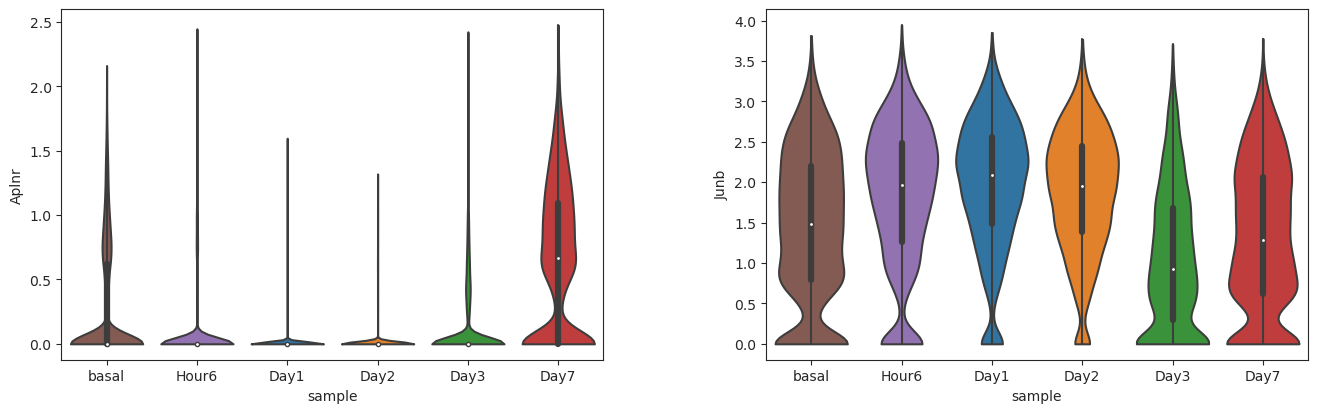

cell_id
Day0_AAACCTGAGGGTCGAT-1    immunec
Day0_AAACCTGAGTCAAGGC-1    immunec
Day0_AAACCTGAGTTACGGG-1    immunec
Day0_AAACCTGAGTTAGGTA-1    immunec
Day0_AAACCTGCACAGACTT-1    immunec
                            ...   
Day7_TTTGTCATCATGTAGC-1    immunec
Day7_TTTGTCATCCAGTATG-1          3
Day7_ACGCAGCGTCATCCCT-1    missing
Day7_CGGGTCATCAAACCAC-1    missing
Day7_GTCTCGTCACATGGGA-1    missing
Name: Clusters, Length: 32131, dtype: category
Categories (11, object): [3, 4, 5, 6, ..., 'devEC', 'immunec', 'missing', 'proEC']

In [43]:
adata_big
sc.pl.violin(adata_big, keys = ["Aplnr", "Junb"],inner='box', stripplot=False, groupby = "sample", order=sample_names)
adata_big.obs["Clusters"]

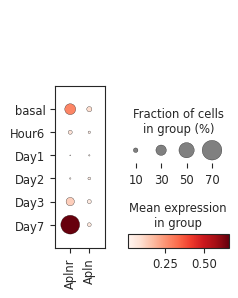

In [44]:
sc.pl.dotplot(adata_big, var_names = ["Aplnr", "Apln"], groupby = "sample", categories_order = sample_names)

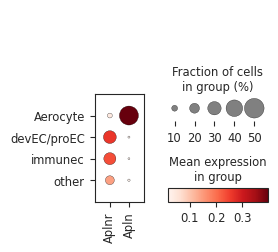

In [45]:
adata_big.obs["sample_cluster"] = adata_big.obs["sample"].astype("str") + "_" + adata_big.obs["cell_type"].astype("str")

sc.pl.dotplot(adata_big, var_names = ["Aplnr", "Apln"], groupby = "cell_type")

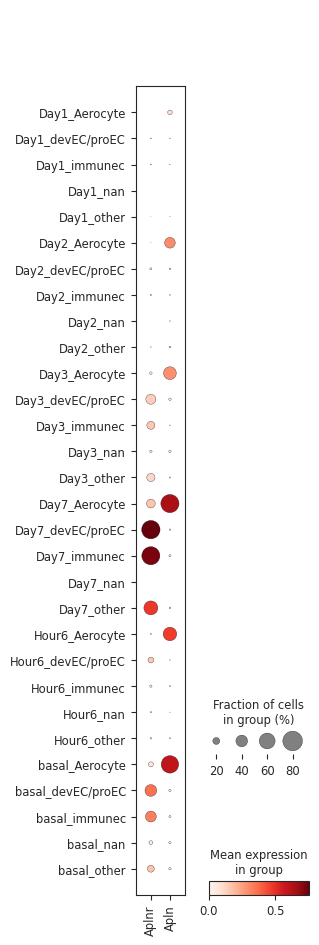

In [46]:
sc.pl.dotplot(adata_big, var_names = ["Aplnr", "Apln"], groupby = "sample_cluster")

Here we clearly see that Aplnr Expression is present at the start but after treatment with LPS drops to almost 0 by day1. However by Day7 -> Aplnr Expression increases and overshoots the expression from the start of the experiment

Lastly, we have som extra plots below with alternative color schemes and looking at Aplnr Expression across the different cell types. 

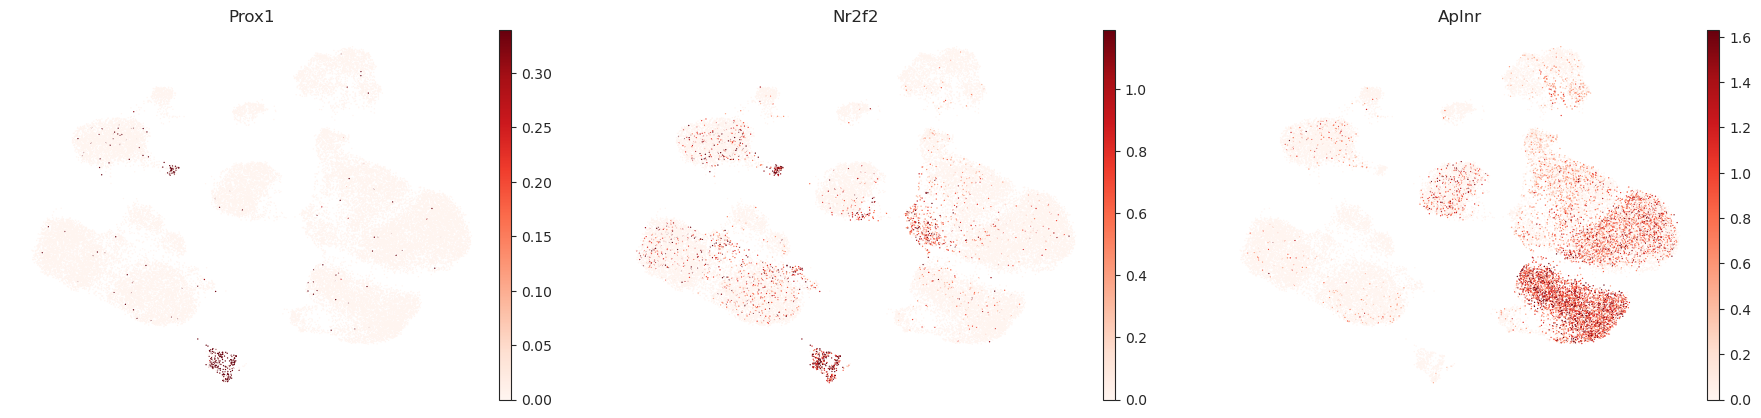

In [47]:
sc.pl.umap(
    adata_big,
    color=["Prox1","Nr2f2", "Aplnr"],     
    vmin=0,
    vmax="p99",  # set vmax to the 99th percentile of the gene count instead of the maximum, to prevent outliers from making expression in other cells invisible. Note that this can cause problems for extremely lowly expressed genes.
    sort_order=False,  # do not plot highest expression on top, to not get a biased view of the mean expression among cells
    frameon=False,
    cmap="Reds"
)


In [48]:
adata_big

AnnData object with n_obs × n_vars = 32131 × 16547
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'scDblFinder_score', 'scDblFinder_class', 'Clusters', 'cell_type', 'scCODA_sample_id', 'sample_cluster'
    var: 'mt', 'ribo', 'hb', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'umap', 'sample_colors', 'Clusters_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap', 'aucell_estimate'
    varm: 'PCs'
    layers: 'counts', 'log1p_norm', 'soupX_counts'
    obsp: 'connectivities', 'distances'

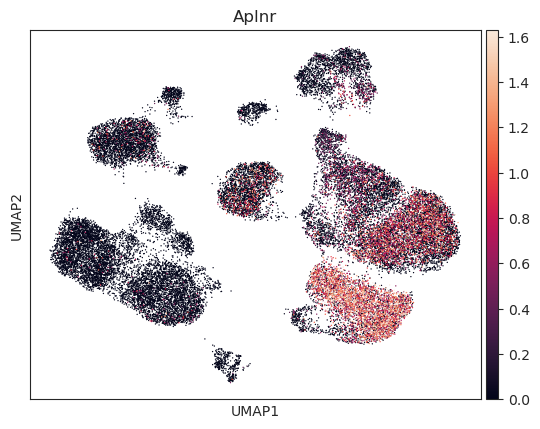

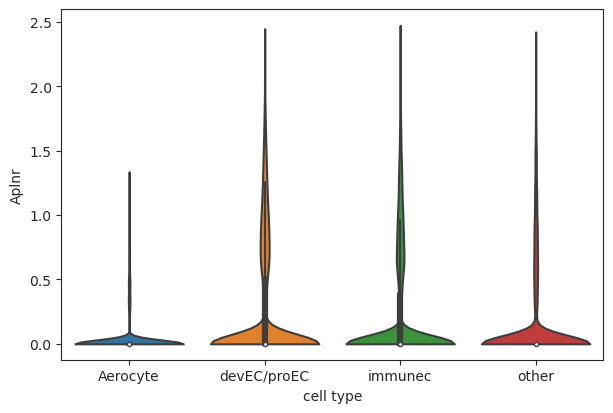

In [49]:
sc.pl.umap(
    adata_big,
    color=["Aplnr"],
    vmax="p99"
)
sc.pl.violin(
    adata_big,inner='box', stripplot=False, 
    keys= ["Aplnr"],
    groupby="cell_type"
)

## Enrichments for adata big Lung lps

To get a better understanding of the data, we performed an over representation analysis (using decoupler-py) against the HALLMARK gene sets from Msigdb, FRIDMAN_SENESCENCE_UP/DN and the EC.SENESCENCE.SIG signature.




### Enrichment using ORA tests


In [50]:
adata_hvg.X = np.nan_to_num(adata_hvg.X)

In [51]:
acts = dc.get_acts(adata_hvg, obsm_key='ora_estimate')

# We need to remove inf and set them to the maximum value observed
acts_v = acts.X.ravel()
max_e = np.nanmax(acts_v[np.isfinite(acts_v)])
acts.X[~np.isfinite(acts.X)] = max_e

acts



acts.obsm["ora_estimate"].columns

Index(['Contact_quiescence_down', 'Contact_quiescence_up', 'EC.SENESCENCE.SIG',
       'FRIDMAN_SENESCENCE_DN', 'FRIDMAN_SENESCENCE_UP',
       'GOBP_CELLULAR_SENESCENCE',
       'GOBP_NEGATIVE_REGULATION_OF_CELLULAR_SENESCENCE',
       'HALLMARK_ADIPOGENESIS', 'HALLMARK_ALLOGRAFT_REJECTION',
       'HALLMARK_ANDROGEN_RESPONSE', 'HALLMARK_ANGIOGENESIS',
       'HALLMARK_APICAL_JUNCTION', 'HALLMARK_APICAL_SURFACE',
       'HALLMARK_APOPTOSIS', 'HALLMARK_BILE_ACID_METABOLISM',
       'HALLMARK_CHOLESTEROL_HOMEOSTASIS', 'HALLMARK_COAGULATION',
       'HALLMARK_COMPLEMENT', 'HALLMARK_DNA_REPAIR', 'HALLMARK_E2F_TARGETS',
       'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION',
       'HALLMARK_ESTROGEN_RESPONSE_EARLY', 'HALLMARK_ESTROGEN_RESPONSE_LATE',
       'HALLMARK_FATTY_ACID_METABOLISM', 'HALLMARK_G2M_CHECKPOINT',
       'HALLMARK_GLYCOLYSIS', 'HALLMARK_HEDGEHOG_SIGNALING',
       'HALLMARK_HEME_METABOLISM', 'HALLMARK_HYPOXIA',
       'HALLMARK_IL2_STAT5_SIGNALING', 'HALLMARK_IL6_JAK_STAT

KeyError: "Could not find keys '['HALLMARK_OXIDATIVE_PHOSPHORYLATION']' in columns of `adata.obs` or in adata.var_names.". Skipping this key.


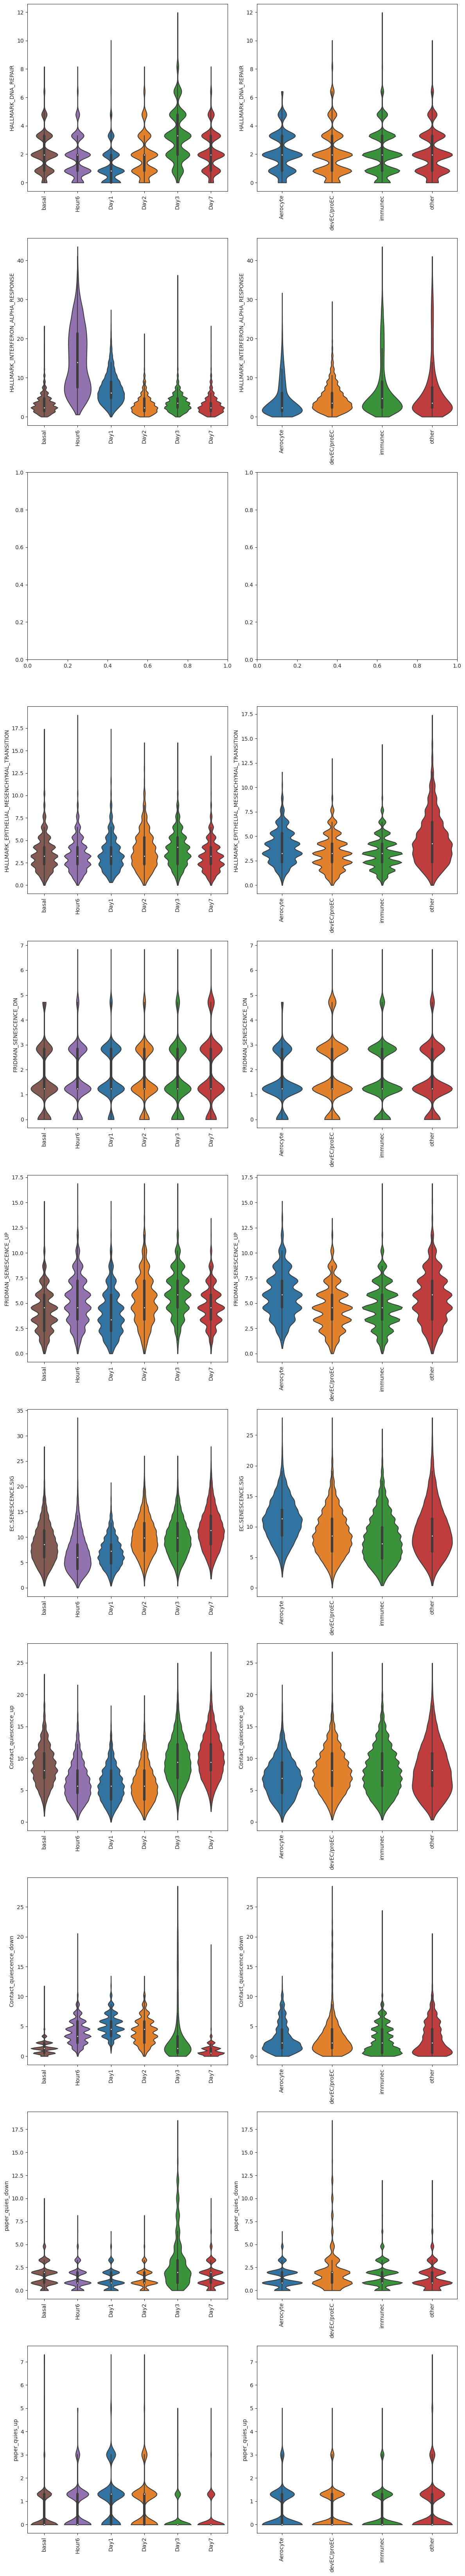

In [52]:
import matplotlib.pyplot as plt

gs_of_interest = ['HALLMARK_DNA_REPAIR', 'HALLMARK_INTERFERON_ALPHA_RESPONSE', 'HALLMARK_OXIDATIVE_PHOSPHORYLATION', 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION',
                  'FRIDMAN_SENESCENCE_DN', 'FRIDMAN_SENESCENCE_UP', 'EC.SENESCENCE.SIG',
                  'Contact_quiescence_up', 'Contact_quiescence_down', 'paper_quies_down', 'paper_quies_up']

# Set the figure size for the violin plots
fig, axes = plt.subplots(len(gs_of_interest), 2, figsize=(12, 6 * len(gs_of_interest)))

# Iterate across three entries of gs_of_interest and plot them in a violin plot
for i, gs in enumerate(gs_of_interest):
    #print(i)
    try:
        #print(i)
        sc.pl.violin(acts, keys=gs, groupby='sample', show = False, rotation=90, multi_panel=False, inner='box', stripplot=False,
                     order=["basal", "Hour6", "Day1", "Day2", "Day3", "Day7"], ax=axes[i, 0])
        sc.pl.violin(acts, keys=gs, groupby='cell_type', show = False, rotation=90, multi_panel=False,inner='box', stripplot=False, ax=axes[i, 1])
    except KeyError as e:
        print(f"KeyError: {e}. Skipping this key.")
        continue

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Here we the activity of some selected gene sets in these data. 
. First we have the per cell Enrichment between six gene sets. After Stimulus at Hour6 Intereron Response Increases due ot the DNA Damage. DNA Repair is active in a subset of proECs at day3. 

The Senescene signatures show now clear signs in the UMAP, however in the Violin plots we see some evidence that the EC Senescence signature falls a bit during inflammation and is increased by day7. HOwever the picture is not very clear here. 

Next we rank the group sources by testing if the change between one samples vs all other samples is significant in some of the gene sets. 

We than take the top five per group and produce the matrix plot below. 

In [53]:
df = dc.rank_sources_groups(acts, groupby='sample', reference='rest', method='t-test_overestim_var')
df

df_basal = dc.rank_sources_groups(acts, groupby='sample', reference='basal', method='t-test_overestim_var')



In [54]:
df_basal

group reference                               names   statistic  \
0     Day1     basal             Contact_quiescence_down  125.017697   
1     Day1     basal  HALLMARK_INTERFERON_GAMMA_RESPONSE  102.431528   
2     Day1     basal        HALLMARK_ALLOGRAFT_REJECTION   89.133161   
3     Day1     basal                    HALLMARK_HYPOXIA   76.071348   
4     Day1     basal      HALLMARK_INFLAMMATORY_RESPONSE   70.713791   
..     ...       ...                                 ...         ...   
340  Hour6     basal      HALLMARK_FATTY_ACID_METABOLISM  -42.342371   
341  Hour6     basal               Contact_quiescence_up  -43.229004   
342  Hour6     basal               HALLMARK_ADIPOGENESIS  -46.391217   
343  Hour6     basal               HALLMARK_ANGIOGENESIS  -51.496279   
344  Hour6     basal                 HALLMARK_PEROXISOME  -51.988496   

     meanchange  pvals  pvals_adj  
0      3.884610    0.0        0.0  
1      9.582159    0.0        0.0  
2      2.854965    0.0        0.0  
3      5.018673    0.0        0.0  
4      3.042878    0.0        0.0  
..          ...    ...        ...  
340   -0.982858    0.0        0.0  
341   -2.385897    0.0        0.0  
342   -1.666817    0.0        0.0  
343   -1.070668    0.0        0.0  
344   -1.334323    0.0        0.0  

[345 rows x 7 columns]

In [55]:
n_markers = 5
source_markers = df.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers =  {k: source_markers[k] for k in ["basal", "Hour6", "Day1", "Day2", "Day3", "Day7"]}

n_markers = 5
source_markers_basal = df_basal.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers_basal =  {k: source_markers_basal[k] for k in ["Hour6", "Day1", "Day2", "Day3", "Day7"]}




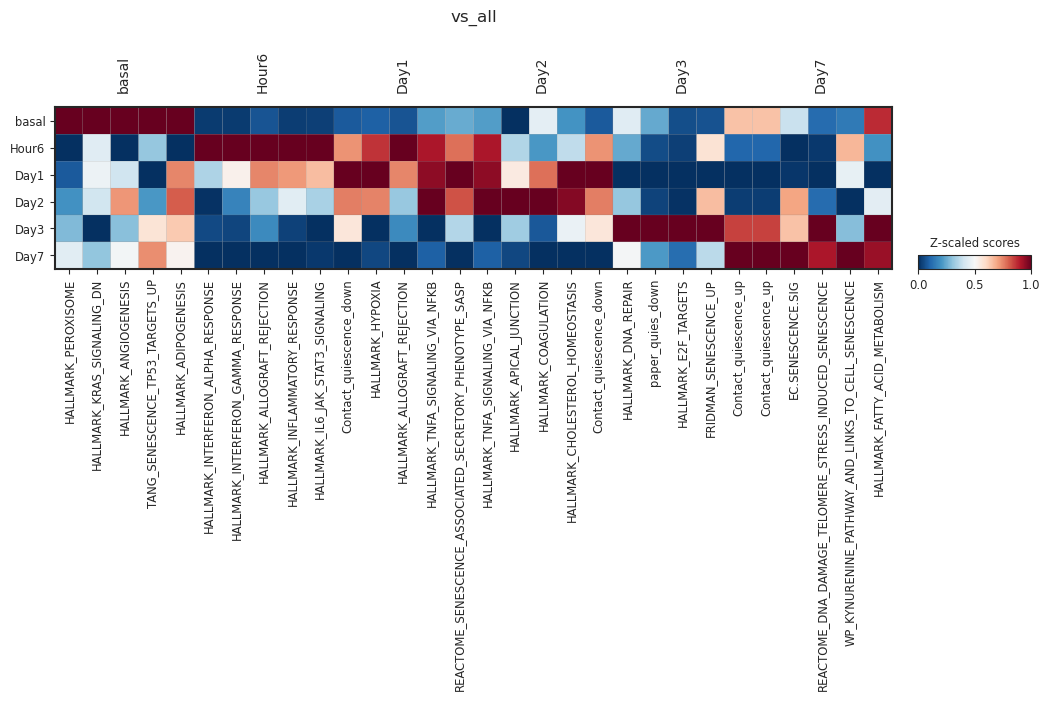

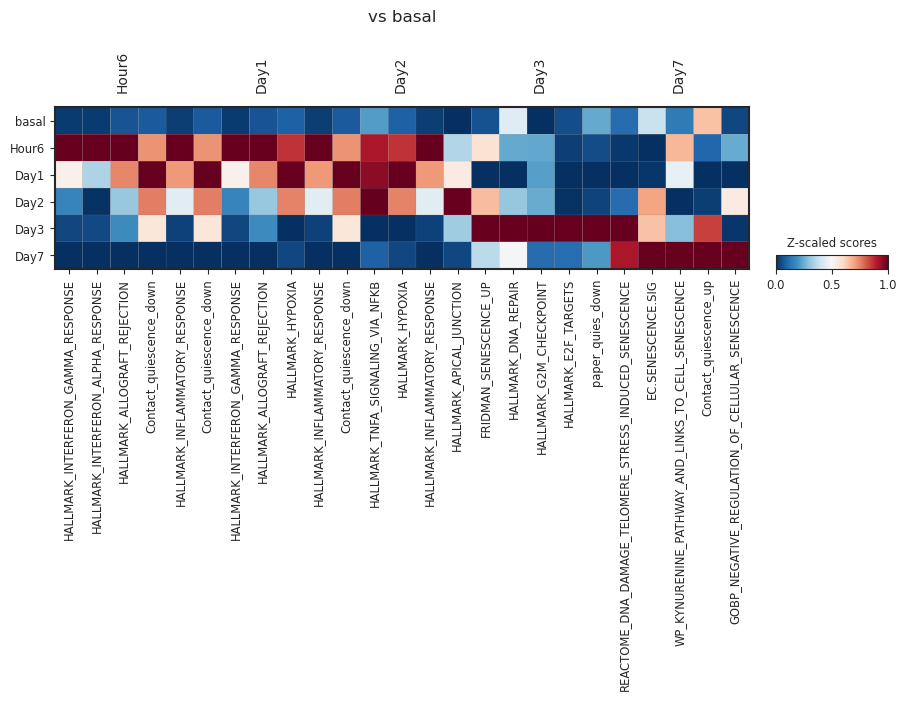

In [56]:
sc.pl.matrixplot(acts, source_markers, 'sample', dendrogram=False, title="vs_all",
                 colorbar_title='Z-scaled scores',standard_scale='var', cmap='RdBu_r',categories_order = ["basal", "Hour6", "Day1", "Day2", "Day3", "Day7"])

sc.pl.matrixplot(acts, source_markers_basal, 'sample', dendrogram=False, title="vs basal",
                 colorbar_title='Z-scaled scores',standard_scale='var', cmap='RdBu_r',categories_order = ["basal", "Hour6", "Day1", "Day2", "Day3", "Day7"])

Here the Activitiy of the top 5 enriched processes per samples is assesed across all samples. -> 
Two versions of this analysis were created. IN the first one we compare the enrichments as SAMPLe vs ALL other smaples and in the second analysis we set "basal as the baseline comparison. 
Results are similar. 

We see that the EC Senescence_sig is enriched on  DAY7. Inflammatory pathways are up from Hour6- day2 and On day3 repair processes are upregulated. 


### Enrichments using AUcell

Here we use an alternative strategy for enrichment analysis. Since we have no weights assigned to genes we stuck to another method that doesn expect weighted gene sets (AUcell)

Plots are corresponding to the OR analysis. 


In [57]:
acts = dc.get_acts(adata_big, obsm_key='aucell_estimate')

# We need to remove inf and set them to the maximum value observed
acts_v = acts.X.ravel()
max_e = np.nanmax(acts_v[np.isfinite(acts_v)])
acts.X[~np.isfinite(acts.X)] = max_e

acts



acts.obsm["aucell_estimate"].columns

Index(['Contact_quiescence_down', 'Contact_quiescence_up', 'EC.SENESCENCE.SIG',
       'FRIDMAN_SENESCENCE_DN', 'FRIDMAN_SENESCENCE_UP',
       'GOBP_CELLULAR_SENESCENCE',
       'GOBP_NEGATIVE_REGULATION_OF_CELLULAR_SENESCENCE',
       'GOBP_REPLICATIVE_SENESCENCE',
       'GOBP_STRESS_INDUCED_PREMATURE_SENESCENCE', 'HALLMARK_ADIPOGENESIS',
       'HALLMARK_ALLOGRAFT_REJECTION', 'HALLMARK_ANDROGEN_RESPONSE',
       'HALLMARK_ANGIOGENESIS', 'HALLMARK_APICAL_JUNCTION',
       'HALLMARK_APICAL_SURFACE', 'HALLMARK_APOPTOSIS',
       'HALLMARK_BILE_ACID_METABOLISM', 'HALLMARK_CHOLESTEROL_HOMEOSTASIS',
       'HALLMARK_COAGULATION', 'HALLMARK_COMPLEMENT', 'HALLMARK_DNA_REPAIR',
       'HALLMARK_E2F_TARGETS', 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION',
       'HALLMARK_ESTROGEN_RESPONSE_EARLY', 'HALLMARK_ESTROGEN_RESPONSE_LATE',
       'HALLMARK_FATTY_ACID_METABOLISM', 'HALLMARK_G2M_CHECKPOINT',
       'HALLMARK_GLYCOLYSIS', 'HALLMARK_HEDGEHOG_SIGNALING',
       'HALLMARK_HEME_METABOLISM',

In [76]:

#plt.switch_backend('nbAgg')
sc.pl.umap(acts, color=gs_of_interest, cmap='RdBu_r',vmax = "p99",ncols=3)
sc.pl.umap(acts, color="sample")


# Set the figure size for the violin plots
fig, axes = plt.subplots(len(gs_of_interest), 2, figsize=(12, 6 * len(gs_of_interest)))
# Set the backend to SVG
for i, gs in enumerate(gs_of_interest):
    #print(i)
    sc.pl.violin(acts, keys=gs, groupby='sample', show = False, rotation=90, multi_panel=False,inner='box', stripplot=False, 
                 order=["basal", "Hour6", "Day1", "Day2", "Day3", "Day7"], ax=axes[i, 0])
    sc.pl.violin(acts, keys=gs, groupby='cell_type', show = False, rotation=90, multi_panel=False, inner='box', stripplot=False, 
                 ax=axes[i, 1])
   

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
#plt.switch_backend('AGG')
for i, gs in enumerate(gs_of_interest):
    # Plot UMAP for each gene set of interest
    sc.pl.umap(acts, color=gs, cmap='RdBu_r', vmax = "p99", ncols=3)
    plt.show()

    # Plot violin plot for 'sample' groupby
    plt.figure(figsize=(12, 6))
    sc.pl.violin(acts, keys=gs, groupby='sample', show = False, rotation=90, multi_panel=False, inner='box', stripplot=False, 
                 order=["basal", "Hour6", "Day1", "Day2", "Day3", "Day7"])
    plt.tight_layout()
    plt.show()

    # Plot violin plot for 'cell_type' groupby
    plt.figure(figsize=(12, 6))
    sc.pl.violin(acts, keys=gs, groupby='cell_type', show = False, rotation=90, multi_panel=False, inner='box', stripplot=False)
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: ylabel='source'>

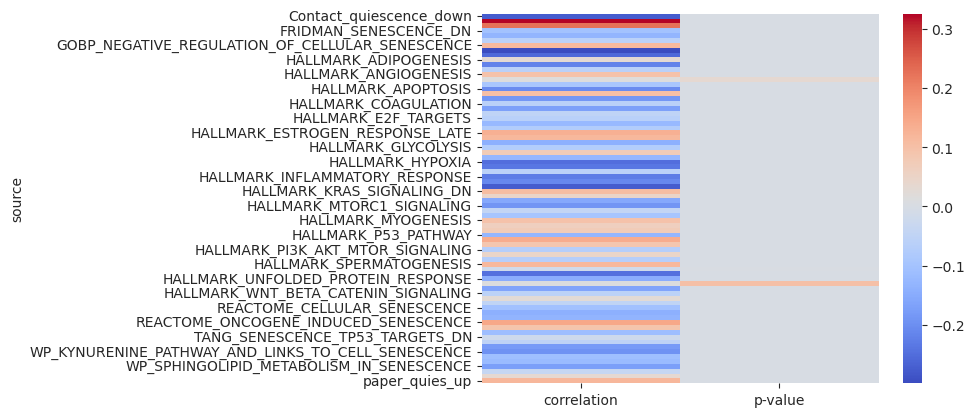

In [59]:
import seaborn as sns
from scipy.stats import pearsonr
import pandas as pd

selected_indices = adata_hvg.obs.index[adata_big.obs['cell_type'].isin(['devEC/proEC', 'immunec'])]

aucell_res = acts.obsm["aucell_estimate"].loc[selected_indices]
Aplnr_expr = pd.Series(adata_big[selected_indices, "Aplnr"].X.todense().A1)

correlations = []
p_values = []
for col in aucell_res:
    corr, p_value = pearsonr(Aplnr_expr, aucell_res[col])
    correlations.append(corr)
    p_values.append(p_value)

# Create a dataframe with the correlations, p-values, and index of aucell_res
df = pd.DataFrame({'correlation': correlations, 'p-value': p_values}, index=aucell_res.columns)

# Plot the correlations as a heatmap using seaborn
sns.heatmap(df, cmap='coolwarm')

In [60]:
# Create a dataframe with the correlations and index of aucell_res
#df = pd.DataFrame({'correlation': correlations}, index=aucell_res.columns)
df = df.sort_values(by='correlation', ascending=False)
df

correlation        p-value
source                                                              
Contact_quiescence_up                        0.325548   0.000000e+00
EC.SENESCENCE.SIG                            0.224792  3.389753e-269
REACTOME_ONCOGENE_INDUCED_SENESCENCE         0.146531  7.152333e-114
HALLMARK_PANCREAS_BETA_CELLS                 0.138741  3.557121e-102
HALLMARK_ESTROGEN_RESPONSE_LATE              0.131658   4.102695e-92
...                                               ...            ...
HALLMARK_HYPOXIA                            -0.248135   0.000000e+00
GOBP_STRESS_INDUCED_PREMATURE_SENESCENCE    -0.256770   0.000000e+00
Contact_quiescence_down                     -0.274809   0.000000e+00
HALLMARK_INTERFERON_GAMMA_RESPONSE          -0.276080   0.000000e+00
GOBP_REPLICATIVE_SENESCENCE                 -0.298753   0.000000e+00

[76 rows x 2 columns]

In [61]:
#df = pd.DataFrame({'correlation': correlations}, index=aucell_res.columns)
df = df.sort_values(by='p-value', ascending=True).head(20)
df

correlation        p-value
source                                                                        
Contact_quiescence_up                                  0.325548   0.000000e+00
Contact_quiescence_down                               -0.274809   0.000000e+00
GOBP_STRESS_INDUCED_PREMATURE_SENESCENCE              -0.256770   0.000000e+00
HALLMARK_HYPOXIA                                      -0.248135   0.000000e+00
HALLMARK_TNFA_SIGNALING_VIA_NFKB                      -0.247323   0.000000e+00
HALLMARK_INTERFERON_GAMMA_RESPONSE                    -0.276080   0.000000e+00
GOBP_REPLICATIVE_SENESCENCE                           -0.298753   0.000000e+00
HALLMARK_IL2_STAT5_SIGNALING                          -0.235412  8.962316e-296
HALLMARK_INFLAMMATORY_RESPONSE                        -0.229868  9.899954e-282
EC.SENESCENCE.SIG                                      0.224792  3.389753e-269
HALLMARK_ALLOGRAFT_REJECTION                          -0.219766  4.313636e-257
HALLMARK_INTERFERON_ALPHA_RESPONSE                    -0.210213  6.555824e-235
HALLMARK_APOPTOSIS                                    -0.204157  2.102114e-221
WP_KYNURENINE_PATHWAY_AND_LINKS_TO_CELL_SENESCENCE    -0.195290  2.115198e-202
HALLMARK_MTORC1_SIGNALING                             -0.190885  2.681240e-193
HALLMARK_CHOLESTEROL_HOMEOSTASIS                      -0.187366  3.465860e-186
WP_GLYCOLYSIS_IN_SENESCENCE                           -0.179473  9.494004e-171
WP_SPHINGOLIPID_METABOLISM_IN_SENESCENCE              -0.172735  3.959421e-158
HALLMARK_COMPLEMENT                                   -0.169667  1.495136e-152
HALLMARK_UV_RESPONSE_UP                               -0.162353  1.108271e-139

<Axes: ylabel='source'>

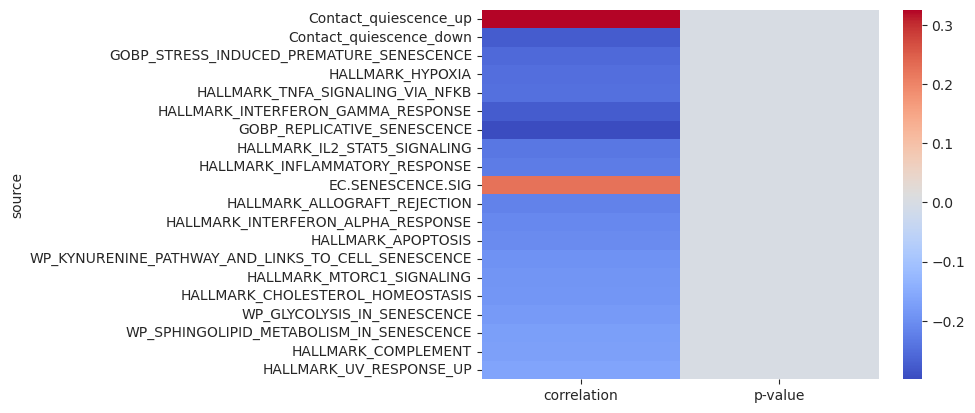

In [62]:
# Plot the correlations as a heatmap using seaborn
sns.heatmap(df, cmap='coolwarm')

In [63]:
df = dc.rank_sources_groups(acts, groupby='sample', reference='rest', method='t-test_overestim_var')
df
df_basal = dc.rank_sources_groups(acts, groupby='sample', reference='basal', method='t-test_overestim_var')
df_basal

group reference                               names  statistic  \
0     Day1     basal  HALLMARK_INTERFERON_GAMMA_RESPONSE  96.418827   
1     Day1     basal                    HALLMARK_HYPOXIA  80.122798   
2     Day1     basal             Contact_quiescence_down  77.585374   
3     Day1     basal    HALLMARK_TNFA_SIGNALING_VIA_NFKB  74.383929   
4     Day1     basal      HALLMARK_INFLAMMATORY_RESPONSE  70.070427   
..     ...       ...                                 ...        ...   
375  Hour6     basal     HALLMARK_ESTROGEN_RESPONSE_LATE -47.910214   
376  Hour6     basal      HALLMARK_FATTY_ACID_METABOLISM -52.350077   
377  Hour6     basal  HALLMARK_OXIDATIVE_PHOSPHORYLATION -54.721690   
378  Hour6     basal               HALLMARK_ANGIOGENESIS -56.674749   
379  Hour6     basal               HALLMARK_ADIPOGENESIS -73.683333   

     meanchange  pvals  pvals_adj  
0      0.043205    0.0        0.0  
1      0.032593    0.0        0.0  
2      0.025643    0.0        0.0  
3      0.046737    0.0        0.0  
4      0.017165    0.0        0.0  
..          ...    ...        ...  
375   -0.011689    0.0        0.0  
376   -0.012632    0.0        0.0  
377   -0.018371    0.0        0.0  
378   -0.032954    0.0        0.0  
379   -0.020439    0.0        0.0  

[380 rows x 7 columns]

In [64]:
n_markers = 5
source_markers = df.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers =  {k: source_markers[k] for k in ["basal", "Hour6", "Day1", "Day2", "Day3", "Day7"]}

source_markers_basal = df_basal.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers_basal =  {k: source_markers_basal[k] for k in ["Hour6", "Day1", "Day2", "Day3", "Day7"]}



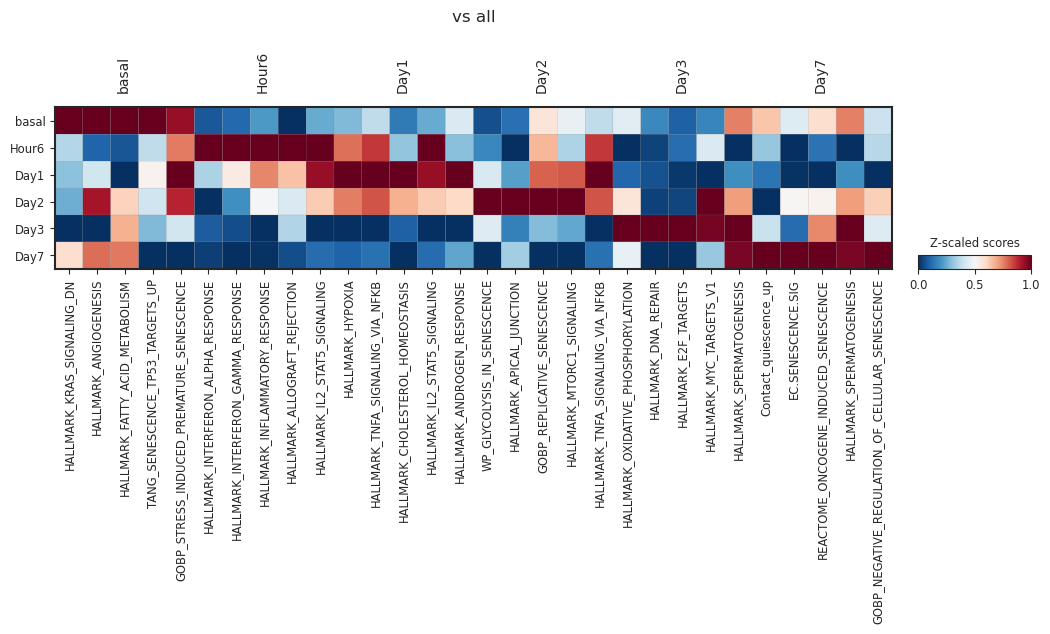

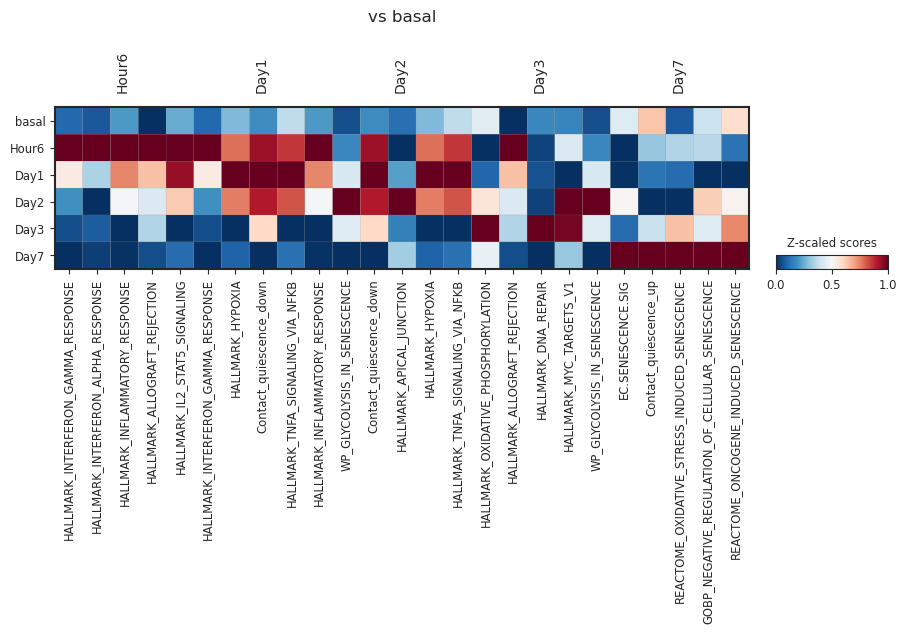

In [65]:
sc.pl.matrixplot(acts, source_markers, 'sample', dendrogram=False,standard_scale="var", title= "vs all",
                 colorbar_title='Z-scaled scores', cmap='RdBu_r', categories_order = ["basal", "Hour6", "Day1", "Day2", "Day3", "Day7"])

sc.pl.matrixplot(acts, source_markers_basal, 'sample', dendrogram=False,standard_scale="var", title = "vs basal",
                 colorbar_title='Z-scaled scores', cmap='RdBu_r', categories_order = ["basal", "Hour6", "Day1", "Day2", "Day3", "Day7"])

In [66]:
adata_big.obs["Clusters"] = adata_big.obs["Clusters"].astype("string")

for col in adata_big.obs.columns:
    #check dtype of column
    if adata_big.obs[col].dtypes in ("string", "category"):
        # if dtype is string convert to category
        adata_big.obs[col] = adata_big.obs[col].astype("object")

adata_big.write_h5ad(adata_out_path)

NameError: name 'adata_out_path' is not defined

Enrichments usinsg AUCell are very similar to ORA -> So we refer to the ORA results. 